In [1]:
import numpy as np
import os
print(os.getcwd())

C:\Users\Song\python\python-data\프로젝트 ML


In [2]:
data_dir = os.chdir(os.getcwd() + "/../../travel_images")

In [3]:
from glob import glob

In [4]:
data_list = glob('*.*')
data_list[:5]

['architecure (1).jpg',
 'architecure (10).jpg',
 'architecure (100).jpg',
 'architecure (1000).jpg',
 'architecure (1001).jpg']

In [5]:
len(data_list), type(data_list)

(35034, list)

### 너무 많아서 2000개씩 정리


In [6]:
architecture_list=glob('architecure*.*')
art_and_culture_list=glob('art_and_culture*.*')
food_and_drinks_list=glob('food_and_drink*.*')
travel_and_adventure_list=glob('travel*.*')

In [7]:
len(architecture_list),len(art_and_culture_list), len(food_and_drinks_list), len(travel_and_adventure_list)

(8763, 8695, 8776, 8800)

In [8]:
print(len(architecture_list)+len(art_and_culture_list)+len(food_and_drinks_list)+len(travel_and_adventure_list))


35034


In [11]:
data_list=architecture_list[:2000]+art_and_culture_list[:2000]+food_and_drinks_list[:2000]+travel_and_adventure_list[:2000]

In [12]:
len(data_list)


8000

In [13]:
from tensorflow.keras.preprocessing.text import text_to_word_sequence

In [14]:
token = text_to_word_sequence(data_list[0])
token

['architecure', '1', 'jpg']

In [15]:
label = []

In [16]:
for i in data_list[:100] :
    token = text_to_word_sequence(i)
    label.append(token[0])
print(len(label))
print(label[:5])

100
['architecure', 'architecure', 'architecure', 'architecure', 'architecure']


In [17]:
label2 = []

In [18]:
for i in data_list :
    token = text_to_word_sequence(i)
    label2.append(token[0])
print(len(label2))
print(label2[:5])

8000
['architecure', 'architecure', 'architecure', 'architecure', 'architecure']


## 라벨인코더
### >>> 카테고리형 문자를 숫자로 자동 변환 해주는 역할

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
encoder = LabelEncoder()
label3 = encoder.fit_transform(label2)
label3[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [21]:
import cv2
import matplotlib.pyplot as plt

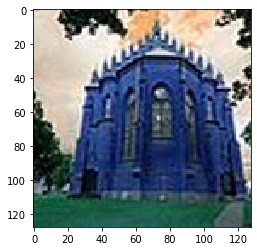

In [22]:
img = cv2.imread(data_list[0])
plt.imshow(img)

In [23]:
img.shape

(128, 128, 3)

## 표준화

In [24]:
image1 = img/255
image1[0][0]

array([0.84705882, 0.81960784, 0.74509804])

## 크기를 동일하게 변경하여 맞춰주기

In [25]:
data_height = 150
data_width = 150
channel_n = 3

In [26]:
image2 = cv2.resize(image1, (data_height, data_width))
image2.shape

(150, 150, 3)

In [27]:
img_list = []
# 255로 표준화시켜주고, 크기 변경하고 나서의 결과를 모아주기 위한 리스트
for x in data_list :
    try :
        scaled_one = cv2.imread(x) / 255
    except :
        scaled_one = 0
    resized_one = cv2.resize(scaled_one, (data_height, data_width))
#     print('변경전 : ', scaled_one.shape)
#     print('변경후 : ', resized_one.shape)   
    img_list.append(resized_one)
len(img_list), img_list[0].shape

(8000, (150, 150, 3))

### 0으로 해춰지는 4차원 배열을 하나 만들어두었다가<br>이미지 하나하나를 스케일링하고 리사이징해서<br>4차원에 하나식 넣기

In [35]:
total_images = np.zeros((5, data_height, data_width, channel_n))
total_images

array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]],


       [[[0., 0., 0.],
         [0., 0., 0.],
         [0., 

In [36]:
# 읽어온 이미지 목록을 넣으면 라벨링, 스케일링, 리사이징하는 함수 선언
def make_file(data_height, data_width, channel_n, data_list_len): # 높이, 너비, 컬러, 리스트 길이
    # 라벨링한 결과를 넣을 1차원 리스트
    label=[]
    # 4차원으로 만들기 위한 4차원 리스트 필요
    images=np.zeros((data_list_len, data_height, data_width, channel_n))
    # 이미지 리스트에서 하나씩 꺼내서 라벨링, 스케일링, 리사이징
    for i, image in enumerate(data_list):
        # 라벨링 : dog.01.jpg
        tokens=text_to_word_sequence(image, filters='()')
        label.append(tokens[0])
        
        # 읽어서 스케일링, 리사이징 
        image=cv2.imread(image) #읽기
        image=cv2.resize(image, (data_height, data_width)) /255 #리사이징, 스케일링
        # 4차원 리스트에 하나씩 append
        images[i, :, :, :]=image
    label2=np.array(label)
    return label2, images

In [37]:
labels, images = make_file(data_height, data_width, channel_n, len(data_list))

In [38]:
labels.shape

(8000,)

In [39]:
items = labels
encoder = LabelEncoder()
label = encoder.fit_transform(items)
label, len(label) 

(array([0, 0, 0, ..., 3, 3, 3], dtype=int64), 8000)

In [40]:
encoder.classes_

array(['architecure', 'art_and_culture', 'food_and_drink', 'travel'],
      dtype='<U15')

In [41]:
from sklearn.model_selection import train_test_split
x = images
y = label

X_train, X_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size= 0.3,
                                                    random_state=55
                                                   )
print(X_train.shape, X_test.shape)

(5600, 150, 150, 3) (2400, 150, 150, 3)


## 딥러닝 모델 만들기!!!

In [42]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [43]:
model = Sequential()

# 특성추출 레이어를 쌓아준다
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(data_height, data_width, 3)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D((2,2)))

# 딥러닝 학습 레이어를 쌓아준다.
# 입력 -- 히든 -- 출력 순서대로 쌓아준다.

# 입력(1개) -- 1차원이여야함
model.add(Flatten()) # 이미지 데이터를 1차원으로 만들어주는 객체

# 히든
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(16, activation='relu'))
model.add(Dropout(rate=0.5))

# 출력(1개) -- 딥러닝하는 학습의 종류에 따라 다르게 써우어야 한다.!!
# 2진 분류인 경우(1, sigmoid)
# 다중 분류인 경우(n, softmax)
# 회귀인 경우(1, linear)
model.add(Dense(4, activation='softmax')) #결과가 엘리먼트로 출력됨. 0.5를 기준으로 판별
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 82944)             0         
                                                                 
 dense (Dense)               (None, 64)                5

In [46]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
             )

In [47]:
# epoch마다 train 의 loss, acc뿐만 아니라,
# test의 loss, acc을 알고 싶으면
# fit(validation_data = (X_test, y_test))\
#조기종료(earlyStoppin)
# rpoch를 실행할 때 최적의 acc인경우ㅡ 더이상 epoch를 수행하지 않아도 되게
# 모델저장(checkPoint)
# 최적의 acc인 경우의 가중치를 자동으로 모델파일로 저장하게 설정
# 특정한 상황을 기다렸다가 특정한 처리를 하고자 하는 경우(콜백함수)
# 1) 객체를 만들어주고, 2) fit(cakkbacks = [객체])
es = EarlyStopping(patience=5, restore_best_weights=True)
cp = ModelCheckpoint('best_animalCNN_model.h5')

cnn_history = model.fit(X_train, 
                        y_train,                
                        batch_size=128,
                        epochs=10,
                        validation_data = (X_test, y_test),
                        callbacks = [es, cp],
                        verbose=2
                        )

Epoch 1/10
44/44 - 47s - loss: 1.3695 - accuracy: 0.3357 - val_loss: 1.1376 - val_accuracy: 0.4783 - 47s/epoch - 1s/step
Epoch 2/10
44/44 - 43s - loss: 1.1417 - accuracy: 0.4709 - val_loss: 0.9699 - val_accuracy: 0.6079 - 43s/epoch - 975ms/step
Epoch 3/10
44/44 - 43s - loss: 1.0237 - accuracy: 0.5420 - val_loss: 0.9755 - val_accuracy: 0.5896 - 43s/epoch - 974ms/step
Epoch 4/10
44/44 - 43s - loss: 0.9601 - accuracy: 0.5688 - val_loss: 0.8171 - val_accuracy: 0.6637 - 43s/epoch - 974ms/step
Epoch 5/10
44/44 - 43s - loss: 0.8690 - accuracy: 0.6304 - val_loss: 0.8830 - val_accuracy: 0.6592 - 43s/epoch - 981ms/step
Epoch 6/10
44/44 - 44s - loss: 0.7901 - accuracy: 0.6709 - val_loss: 0.7058 - val_accuracy: 0.7258 - 44s/epoch - 992ms/step
Epoch 7/10
44/44 - 47s - loss: 0.7300 - accuracy: 0.7064 - val_loss: 0.7636 - val_accuracy: 0.7396 - 47s/epoch - 1s/step
Epoch 8/10
44/44 - 44s - loss: 0.6359 - accuracy: 0.7516 - val_loss: 0.6928 - val_accuracy: 0.7783 - 44s/epoch - 992ms/step
Epoch 9/10
44/

In [48]:
test_result=model.evaluate(X_test, y_test)

75/75 [==============================] - 4s 57ms/step - loss: 0.6919 - accuracy: 0.7846


In [49]:
test_result

[0.6918770670890808, 0.784583330154419]

## 적중률 시각화

In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix


In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [52]:
# 다중 분류에서는 predict를 할 때 각 항목이 될 가능성을 계산해준다.
y_pred=model.predict(X_test)

In [53]:
y_pred_test=np.argmax(y_pred, axis=-1)

In [54]:
print(confusion_matrix(y_pred_test, y_test))

[[598   5   9  72]
 [  0 408  76  15]
 [ 13 111 467  88]
 [ 31  42  55 410]]


In [55]:
df=pd.DataFrame(confusion_matrix(y_pred_test, y_test))

In [56]:
# 각 travel image의 적중률 리스트
score_list=[]
for i in range(4):
    score_list.append(round((df.iloc[i,i]/df.sum(axis=1)[i])*100, 2))

In [57]:
score_list

[87.43, 81.76, 68.78, 76.21]

In [58]:
target_names = ['architecture', 'art_and_culture', 'food_and_drinks', 'travel_and_adventure']

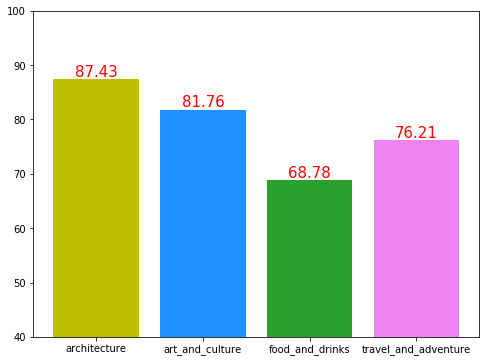

In [59]:
# 각 이미지의 적중률
plt.figure(figsize=(8,6))
x = target_names
fashon_type = target_names
values = score_list
colors = ['y', 'dodgerblue', 'C2', 'violet', 'brown', 'indigo', 'aquamarine', 'orange', 'khaki', 'slategray']

plt.bar(x, values, color=colors)
plt.xticks(x, fashon_type)
plt.ylim([40, 100])

for i, v in enumerate(x):
    plt.text(v, values[i], values[i],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 15, 
             color='red',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom')    # verticalalignment (top, center, bottom)

plt.show()

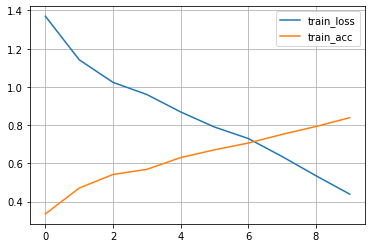

In [60]:
# 손실률, 정확도 시각화
plt.plot(cnn_history.history['loss'])
#plt.plot(loss)
plt.plot(cnn_history.history['accuracy'])
#plt.plot(acc)
plt.legend(['train_loss', 'train_acc'])
plt.grid()
plt.show()

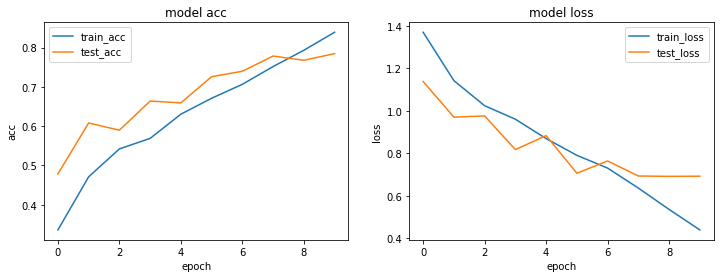

In [61]:
# cnn_history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1) # 1행 2열의 도표, 1열
plt.plot(cnn_history.history['accuracy'])
plt.plot(cnn_history.history['val_accuracy'])
plt.title('model acc')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend(['train_acc', 'test_acc'])
plt.subplot(1, 2, 2) # 1행 2열의 도표, 2열
plt.plot(cnn_history.history['loss'])
plt.plot(cnn_history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_loss', 'test_loss'])

## 필요없는 이미지 제거

In [23]:
# 사진 35093개의 크기를 모두 변경
resize_list=[]
error_list=[]
i=0
for x in data_list:
    try:
        one=cv2.imread(x)/255
        resize=cv2.resize(one, (data_height, data_width))
        resize_list.append(resize)
        i=i+1
    except:
        error_list.append((i,x))
        i=i+1
        pass

In [40]:
# Nontype 이미지 제거
os.remove(error_list[0][1])

FileNotFoundError: [WinError 2] 지정된 파일을 찾을 수 없습니다: 'art_and_culture (1268).jpg'

In [25]:
# Nontype 이미지 전부 제거
for i in range(1, len(error_list)):
    os.remove(error_list[i][1])

In [24]:
labels.shape

(35034,)

In [25]:
items = labels
encoder = LabelEncoder()
label = encoder.fit_transform(items)
label, len(label) 

(array([0, 0, 0, ..., 3, 3, 3], dtype=int64), 35034)

In [26]:
encoder.classes_

array(['architecure', 'art_and_culture', 'food_and_drink', 'travel'],
      dtype='<U15')

In [30]:
from sklearn.model_selection import train_test_split
x = images
y = label

X_train, X_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size= 0.3,
                                                    random_state=55
                                                   )
print(X_train.shape, X_test.shape)

MemoryError: Unable to allocate 5.29 GiB for an array with shape (10511, 150, 150, 3) and data type float64